In [125]:
import cv2
import numpy as np
import os
from tqdm import tqdm
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
%matplotlib inline
TRAIN_DIR = 'train'
TEST_DIR = 'test'
IMG_SIZE = 200
LR = 1e-3
MODEL_NAME = 'art42-convnet'
art_list = ['ROA',
            'ROTI',
            'SETH',
            'STEW',
            'RERO',
            'OMEYER',
            'JR',
            'KUKA',
            'EVOL',
            'GRIS1',
            'PANTONIO',
            'DRAN',
            'JEF_AEROSOL',
            'ZEVS',
            'BANKSY',
            'C215']

In [99]:
def create_label(image_name):
#     print("hello " + image_name)
    """ Create an one-hot encoded vector from image name """
    word_label = image_name.split('.')[-2]
#     print ("word_label " + word_label)
    if 'ROA' in word_label:
#         print("ROAAAAAAA")
        return np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    elif 'ROTI' in word_label:
        return np.array([0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    elif 'SETH' in word_label:
        return np.array([0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    elif 'STEW' in word_label:
        return np.array([0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
    elif 'RERO' in word_label:
        return np.array([0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0])
    elif 'OMEYER' in word_label:
        return np.array([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0])
    elif 'JR' in word_label:
        return np.array([0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0])
    elif 'KUKA' in word_label:
        return np.array([0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0])
    elif 'EVOL' in word_label:
        return np.array([0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0])
    elif 'GRIS1' in word_label:
        return np.array([0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0])
    elif 'BRUSK' in word_label:
        return np.array([0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0])
    elif 'PANTONIO' in word_label:
        return np.array([0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0])
    elif 'DRAN' in word_label:
        return np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0])
    elif 'JEF_AEROSOL' in word_label:
        return np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0])
    elif 'ZEVS' in word_label:
        return np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0])
    elif 'BANKSY' in word_label:
        return np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0])
    elif 'C215' in word_label:
        return np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1])

In [100]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        path = os.path.join(TRAIN_DIR, img)
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        training_data.append([np.array(img_data), create_label(img)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    print ("IT'S OK TRAIN DATA")
    return training_data

In [132]:
def create_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        print(img_num)
        testing_data.append([np.array(img_data), img_num])

    shuffle(testing_data)
    print ("IT'S OK TEST DATA")
    np.save('test_data.npy', testing_data)
    return testing_data

In [133]:
# If dataset is not created:
train_data = create_train_data()
test_data = create_test_data()
# If you have already created the dataset:
# train_data = np.load('train_data.npy')
# test_data = np.load('test_data.npy')
train = train_data[:-500]
test = train_data[-500:]
X_train = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = [i[1] for i in train]
X_test = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = [i[1] for i in test]

100%|██████████| 35/35 [00:00<00:00, 2105.76it/s]

IT'S OK TRAIN DATA
KUKA_5
EVOL_10
INVADER_6
OMEYER_6
EVOL_9
GRIS1_2
JEF_AEROSOL_1
BRUSK_8
ZEVS_4
GRIS1_12
JR_8
STEW_4
ROTI_5
DRAN_7
ROA_8
SETH_6
RERO_2
PANTONIO_6
C215_4
ZEVS_5
C215_8
BRUSK_7
BANKSY_5
ROTI_6
C215_7
OMEYER_7
INVADER_5
EVOL_8
BANKSY_4
DRAN_8
STEW_5
DRAN_9
SETH_7
PANTONIO_5
JR_9
IT'S OK TEST DATA


In [103]:
# If dataset is not created:
train_data = create_train_data()
test_data = create_test_data()
# If you have already created the dataset:
# train_data = np.load('train_data.npy')
# test_data = np.load('test_data.npy')
train = train_data[:-500]
test = train_data[-500:]
X_train = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = [i[1] for i in train]
X_test = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = [i[1] for i in test]


100%|██████████| 35/35 [00:00<00:00, 2851.94it/s]

IT'S OK TRAIN DATA
IT'S OK TEST DATA


In [104]:
tf.reset_default_graph()
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)
convnet = fully_connected(convnet, 17, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')
model = tflearn.DNN(convnet, tensorboard_dir='log', tensorboard_verbose=0)
model.fit({'input': X_train}, {'targets': y_train}, n_epoch=10,
          validation_set=({'input': X_test}, {'targets': y_test}),
          snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
---------------------------------
Run id: art42-convnet
Log directory: log/
INFO:tensorflow:Summary name Accuracy/ (raw) is illegal; using Accuracy/__raw_ instead.
---------------------------------
Training samples: 0
Validation samples: 94
--


ROA 0.074362, ROTI 0.053795, SETH 0.040369, STEW 0.032994, RERO 0.076276, OMEYER 0.054575, JR 0.058887, KUKA 0.068381, EVOL 0.048047, GRIS1, 0.057278, BRUSK, 0.045249, PANTONIO, 0.052382, DRAN 0.103840, JEF_AEROSOL 0.068068, ZEVS 0.059074, BANKSY, 0.039736, C215 0.066687


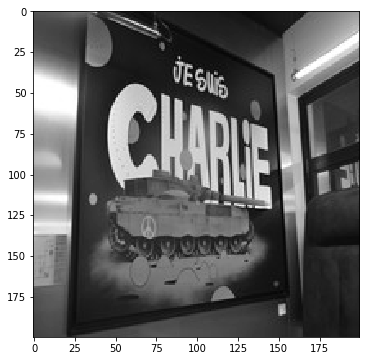

In [139]:
d = test_data[3]
img_data, img_num = d

data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
prediction = model.predict([data])[0]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.imshow(img_data, cmap="gray")
# print("cat: %f, dog: %f" % (prediction[0], prediction[1]))
# print("ROA %f, ROTI %f, SETH %f, STEW %f, RERO %f, OMEYER %f, JR %f, KUKA %f, EVOL %f, GRIS1, %f, BRUSK, %f, PANTONIO, %f, DRAN %f, JEF_AEROSOL %f, ZEVS %f, BANKSY, %f, C215 %f" % (prediction[0],prediction[1], prediction[2], prediction[3], prediction[4], prediction[5], prediction[6], prediction[7], prediction[8], prediction[9],prediction[10] prediction[11], prediction[12], prediction[13], prediction[14], prediction[15], prediction[16]))
# print(prediction[0],prediction[1], prediction[2], prediction[3], prediction[4], prediction[5], prediction[6], prediction[7], prediction[8], prediction[9],prediction[10] prediction[11], prediction[12], prediction[13], prediction[14], prediction[15], prediction[16])
print("ROA %f, ROTI %f, SETH %f, STEW %f, RERO %f, OMEYER %f, JR %f, KUKA %f, EVOL %f, GRIS1, %f, BRUSK, %f, PANTONIO, %f, DRAN %f, JEF_AEROSOL %f, ZEVS %f, BANKSY, %f, C215 %f" % (prediction[0], prediction[1], prediction[2], prediction[3], prediction[4], prediction[5], prediction[6], prediction[7],prediction[8], prediction[9], prediction[10], prediction[11], prediction[12], prediction[13], prediction[14], prediction[15], prediction[16]))
fig=plt.figure(figsize=(16, 12))

12
[ 0.06964841  0.05301102  0.03941751  0.03515743  0.07810862  0.05520077
  0.05947606  0.06635191  0.05290971  0.05680865  0.04684858  0.0542149
  0.10131485  0.06924689  0.05885803  0.04116259  0.06226409]
JEF_AEROSOL
12
[ 0.07335939  0.05532625  0.04051757  0.03541735  0.07590942  0.05485322
  0.05877313  0.06236219  0.05245953  0.05860651  0.04809813  0.05722809
  0.09682453  0.06767211  0.05817271  0.04271352  0.06170636]
JEF_AEROSOL
12
[ 0.07067527  0.05146658  0.03865646  0.03632605  0.07565377  0.05785169
  0.05800796  0.06681449  0.05724578  0.0545824   0.04753374  0.06242414
  0.09663998  0.0656876   0.06058863  0.03871975  0.0611257 ]
JEF_AEROSOL
12
[ 0.07436245  0.05379514  0.04036917  0.03299402  0.07627568  0.05457451
  0.05888718  0.06838112  0.04804671  0.05727803  0.04524931  0.05238169
  0.10384028  0.0680676   0.05907424  0.03973615  0.06668666]
JEF_AEROSOL
12
[ 0.07221361  0.05324292  0.03798566  0.034685    0.08028082  0.05664538
  0.05670601  0.06882492  0.05342

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


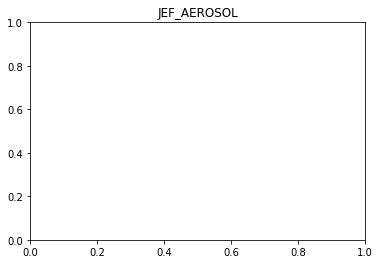

INFO:tensorflow:/home/eren_ozdek/image_classifier/art42/ART42_img/art42-convnet is not in all_model_checkpoint_paths. Manually adding it.


In [154]:
# print(test_data[:16])
for num, data in enumerate(test_data[:16]):
#     print(num)
    img_num = data[1]
    img_data = data[0]

    y = fig.add_subplot(4, 4, num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    model_out = model.predict([data])[0]
#     if np.argmax(model_out) == 1:
#         str_label='Dog'
#     else:
#         str_label='Cat'
    print(np.argmax(model_out))
    print(model_out)
    str_label = art_list[np.argmax(model_out)]
    print(str_label)
    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

model.save(MODEL_NAME)

In [144]:

with open('submission-fle.csv', 'w') as f:
    for data in tqdm(test_data):
        img_num = data[1]
        img_data = data[0]

        y = fig.add_subplot(4, 4, num+1)
        orig = img_data
        data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
        model_out = model.predict([data])[0]
        f.write('{},{}\n'.format(img_num, model_out[1]))

  0%|          | 0/35 [00:00<?, ?it/s]/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
100%|██████████| 35/35 [00:00<00:00, 272.68it/s]
